In [1]:
import pickle 
from gensim.models import Word2Vec

In [7]:
with open('/home/aistudio/data/data10325/corpus.pickle', 'rb') as f:
    corpus = pickle.load(f)

In [9]:
corpus[-1]

['麦',
 '·',
 '柏',
 '辛格',
 '（',
 'Mike',
 ' ',
 'Bolsinger',
 '）',
 ' ',
 '美国',
 '棒球',
 '选手',
 '于于',
 '2010',
 '年',
 '美国',
 '职棒',
 '选秀',
 '亚利桑那',
 '响尾蛇',
 '选进',
 '曾于',
 '2015',
 '-',
 '2016',
 '年',
 '二个',
 '球季',
 '洛杉矶',
 '道奇',
 '上过',
 '联盟',
 '2018',
 '年',
 '球季',
 '效力',
 '日本',
 '职棒',
 '千叶',
 '罗德',
 '海洋',
 '队',
 '守备',
 '位置',
 '投手']

In [10]:
model = Word2Vec(sentences=corpus, size=300, window=5, min_count=3, workers=4)

In [17]:
model.wv['数学']

array([ 1.8447542e+00, -1.4770380e+00,  7.8203398e-01, -1.3279034e+00,
       -4.2965311e-01,  2.2234602e-01,  3.2660732e-01,  6.7887300e-01,
       -5.4781634e-01, -9.5962244e-01, -1.3733669e-01,  3.2429996e+00,
        8.7391943e-01, -2.7829409e+00,  2.1006451e+00, -2.6590616e-01,
        1.1573297e+00,  1.3756665e+00,  1.5555732e+00,  1.2967204e+00,
        2.5545363e+00, -1.4115905e+00, -3.5184768e-01,  2.4179919e+00,
       -4.0124440e-01,  1.5387823e-01, -1.3819650e-01,  4.6999857e-01,
        1.7187718e+00,  2.1345092e-01,  1.0994453e+00, -8.9113545e-01,
        8.1348276e-01,  7.1588480e-01, -6.7265034e-01,  7.9642504e-01,
       -2.4629207e+00,  5.3279126e-01, -1.2640357e+00,  1.2427166e+00,
       -1.0591220e+00,  5.7976931e-01,  3.1700806e-04, -1.0386418e+00,
       -3.5228321e-01, -3.7084404e-01,  1.6949888e+00, -4.6641982e-01,
        2.7819386e-01,  2.7137210e+00,  2.3272240e+00,  2.2013836e-01,
       -2.0203855e+00,  5.0358254e-01, -1.1824121e+00, -1.4653750e-01,
      

In [16]:
model.save('word2vec.model')

In [20]:
model.most_similar('美丽')

/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('迷人', 0.6016221642494202),
 ('最美', 0.5892214179039001),
 ('漂亮', 0.575289249420166),
 ('灿烂', 0.5583431720733643),
 ('美好', 0.5483543276786804),
 ('温柔', 0.547942578792572),
 ('丑陋', 0.5433224439620972),
 ('甜美', 0.5418391823768616),
 ('优雅', 0.5390130281448364),
 ('诱人', 0.5343248844146729)]

In [22]:
model.wv.distance('凉爽', '寒冷')

0.25672000646591187

In [23]:
model.wv.distance('凉爽', '酷热')

0.25681072473526

* 根据上面的距离判断，词向量并没有捕捉到同义和反义，可能只是捕捉到它们都是表示天气状态，属于同一类，所以距离都相近

In [4]:
model.wv.most_similar(positive=['女儿', '爸爸'], negative=['妈妈'])

[('儿子', 0.7419399619102478),
 ('大儿子', 0.6479535102844238),
 ('妹妹', 0.6390544176101685),
 ('小女儿', 0.6367290019989014),
 ('小儿子', 0.6198438405990601),
 ('弟弟', 0.6197594404220581),
 ('妻子', 0.6164944171905518),
 ('姐姐', 0.6140103936195374),
 ('继女', 0.6133238077163696),
 ('孙女', 0.6129964590072632)]

In [31]:
model['美丽'].shape

/opt/conda/envs/python35-paddle120-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(300,)

In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [6]:
model = Word2Vec.load('word2vec.model')

C:\Users\xxx\Anaconda3\envs\daily\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [14]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    words = ['数学', '酷热', '爸妈', '美丽', '大小', '陶渊明']
    for word in words:
        labels.append(word)
        tokens.append(model[word])
        for sim, _ in model.wv.most_similar(word, topn=50):
            labels.append(sim)
            tokens.append(model[sim])
        
    tsne = TSNE(perplexity=40, init='pca', n_iter=3500, random_state=42)
    new_vectors = tsne.fit_transform(tokens)
    
    x, y = [], []
    for v1, v2 in new_vectors:
        x.append(v1)
        y.append(v2)
        
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(3, 2), textcoords='offset points', ha='center', va='bottom')
        
    plt.show()
    

C:\Users\xxx\Anaconda3\envs\daily\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\xxx\Anaconda3\envs\daily\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


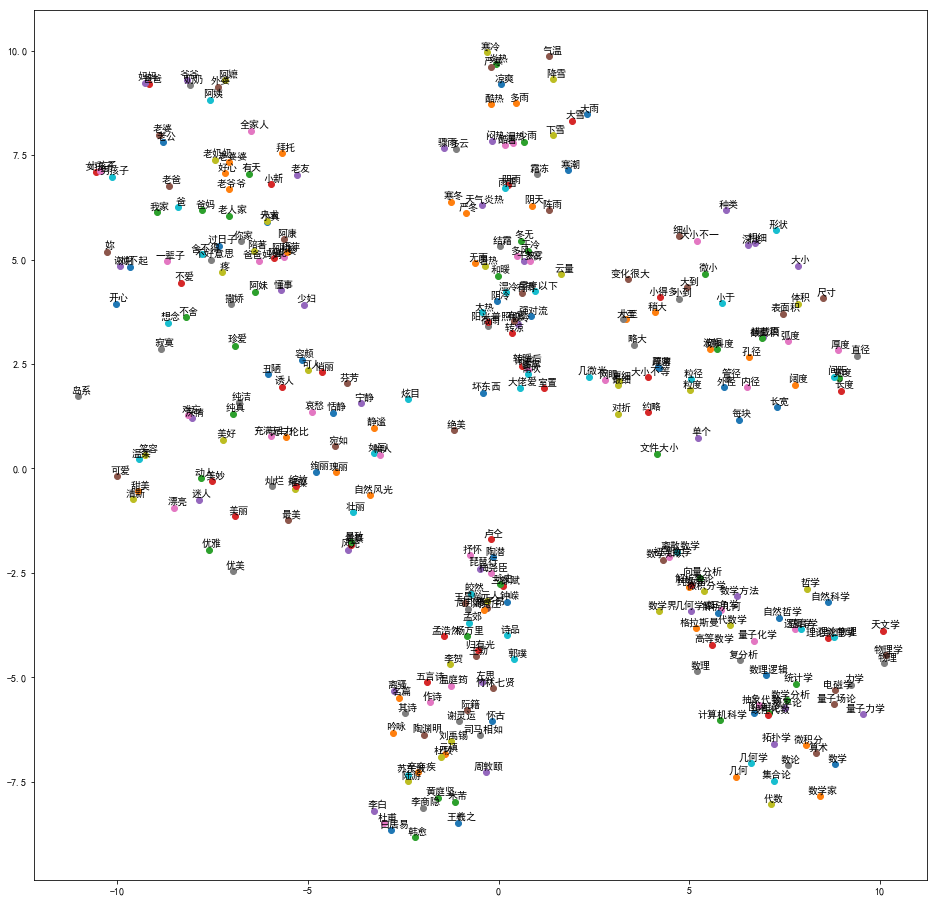

In [15]:
tsne_plot(model)